# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
sns.set_theme(style="darkgrid")

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

pada proses pembacaan data, kadang kala mengalami kesulitan dalam input data dikarenakan perbedaan algoritma/format file yang ada. untuk itu peran "encoding=..." akan menyesuaikan format data dengan kemampuan komputer saat membacanya. sebagai contoh untuk data .csv atau .xlsx yang berformat utf-8 adalah format paling umum, namun terkadang komputer tidak mengenal format tersebut,sehingga digunakan 'ISO-8859-1' sebagai pengenal data tersebut sama seperti data utf-8.

hal krusial pertama yang harus dilakukan ialah mengenali isi data, sehingga kita perlu melihat kolom (features), baris, jumlah data atau hanya sekedar memastikan data terbaca dengan baik dengan mengunakan .head() dan .tail()

In [3]:
data=pd.read_csv('data.csv',encoding='ISO-8859-1',header=0,na_values=[""])
print(data.head(15))
print(data.tail())

   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLO

Pendalaman kondisi data dilakukan dengan deskriptif analisis, dimana hal yang perlu diperhatikan dimulai dari jumlah data, tipe data, banyak kolom dan baris,jumlah data yang unik, hingga melihat central tendensi berupa mean,median,modus,Q1-Q2-Q3,Std. Tujuan dilakukannya hal ini akan memudakan kita mengerti tindakan selanjutnya jika kita sudah mengenali kondisi setiap feature yang ada.

**Descriptive Analysis**

In [4]:
print(data.info())
print(data.columns)
print('Jumlah dimensi data', data.shape)
print(data.nunique())
print(data.dtypes)
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
Jumlah dimensi data (541909, 8)
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64
InvoiceNo       object
StockCode    

**Cleaning DATASET**

Bagian ini adalah bagian tersulit karena membutuhkan ketelitian dan kebiasaan akan membersihkan data. perlu berbagai tindakan validasi dilakukan untuk memastikan data tersebut memang sudah benar clean. hal yang paling umum dibersihkan ialah mengenai data missing, outlier, duplicate,serta convert type data waktu.

selain itu, dalam cleaning dataset kemampuan dalam subsetting untuk mensorting-filtering data sangat dibutuhkan.

In [5]:
#Dropping kolom Country yang dianggap tidak penting
#data=data[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','UnitPrice', 'CustomerID']]

In [6]:
#Menghapus data yang duplicate dan melihat asal pelanggan
print('Input data yang duplicate: {}'.format(data.duplicated().sum()))
data.drop_duplicates(inplace = True)

Input data yang duplicate: 5268


In [7]:
#mengubah format data datetime.
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%Y %H:%M')   #data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate.dt.strftime('%m/%d/%Y %H:%M')

#data['year'] = data['InvoiceDate'].str.split('-').str[0].astype(int) + 10
#data['InvoiceDate'] = data['InvoiceDate'].str.replace('[0-:]*.$','') + data['year'].astype(str)
#Mengubah ke 10 tahun depan.
#data['InvoiceDate'] = data['InvoiceDate'] + timedelta(days=365*10)

data['InvoiceDate'] = data['InvoiceDate'].astype(str).str.replace(r'2010','2020') #'r' digunakan untuk fokus pada digit/number/huruf tersebut.
data['InvoiceDate'] = data['InvoiceDate'].astype(str).str.replace(r'2011','2021')
#print(data['year'].head())
print(data['InvoiceDate'])

0         2020-12-01 08:26:00
1         2020-12-01 08:26:00
2         2020-12-01 08:26:00
3         2020-12-01 08:26:00
4         2020-12-01 08:26:00
                 ...         
541904    2021-12-09 12:50:00
541905    2021-12-09 12:50:00
541906    2021-12-09 12:50:00
541907    2021-12-09 12:50:00
541908    2021-12-09 12:50:00
Name: InvoiceDate, Length: 536641, dtype: object


In [8]:
#Melakukan pengecekan missing data
print(data.isnull().sum().sort_values(ascending=False))

CustomerID     135037
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64


In [9]:
print(data[data.isna().any(axis=1)])

       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

                InvoiceDate  UnitPrice  CustomerID         Country  
622     2020-12-01 11:52:00       0.00         NaN  Un

Data ID merupakan number yang identik, sehingga tidak sesuai jika dilakukan pendekatan statistik untuk memperbaiki kondisi data yang hilang. sehingga solusi terbaik dalam hal missing values ini hanyalah dilakukan proses dropping/penghilangan data.

In [10]:
#Customer ID dan Description itu termasuk hal yang unik sehingga baikknya di drop saja.
data= data.loc[(data['CustomerID'].notnull()) & (data['Description'].notnull())]
print(data.head(10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2020-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2020-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2020-12-01 0

In [11]:
#print(data['CustomerID'].values) / #print(data['CustomerID'].unique())
print('Jumlah pelanggan sesungguhnya',data['CustomerID'].nunique())
print(data.isnull().sum())
print(data['CustomerID'].describe())
data.shape

Jumlah pelanggan sesungguhnya 4372
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
count    401604.000000
mean      15281.160818
std        1714.006089
min       12346.000000
25%       13939.000000
50%       15145.000000
75%       16784.000000
max       18287.000000
Name: CustomerID, dtype: float64


(401604, 8)

In [12]:
data['Description'] = data.Description.str.lower()

In [13]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
#Menghilangkan nilai terendah (Minus) karena merupakan satuan yang tidak mungkin.
data= data[(data.Quantity > 0) & (data.UnitPrice >= 0)]
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  392732.000000  392732.000000  392732.000000
mean       13.153718       3.125596   15287.734822
std       181.588420      22.240725    1713.567773
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13955.000000
50%         6.000000       1.950000   15150.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000    8142.750000   18287.000000


# **EDA (Explatory Data Analysis)**



In [15]:
#Menghitung Jumlah Revenue
data['Revenue_Tot']=data['Quantity']*data['UnitPrice']

In [16]:
data2 = data.copy()
print(data2.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  Revenue_Tot  
0  2020-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1  2020-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2  2020-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3  2020-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4  2020-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  


In [17]:
#Melihat jumlah produk, jumlah transaksi, dan pelanggan
cust_x_prod = pd.DataFrame([{'products': len(data2['StockCode'].value_counts()),    
               'transactions': len(data2['InvoiceNo'].value_counts()),
               'customers': len(data2['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])
print(cust_x_prod)

#Berkurangnya jumlah customer mungkin karena adanya drop nilai untuk quantity dan unit pricenya yang diatas nol, 
#sehingga hal ini memastikan setiap orang pasti membayar jika membeli.

          products  transactions  customers
quantity      3665         18536       4339


In [18]:
#Tanggal beli sebagai petunjuk untuk membuktikan jumlah transaksi pelanggan untuk jumlah produk yang dibeli.
temp = data2.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
jlh_produk = temp.rename(columns = {'InvoiceDate':'Jumlah Produk'})
print(jlh_produk[:15].sort_values('Jumlah Produk',ascending=False))
print(jlh_produk.sum())

    CustomerID InvoiceNo  Jumlah Produk
12     12349.0    577609             73
6      12347.0    573511             47
1      12347.0    537626             31
2      12347.0    542237             29
3      12347.0    549222             24
5      12347.0    562032             22
4      12347.0    556201             18
8      12348.0    539318             17
13     12350.0    543037             17
14     12352.0    544156             15
7      12347.0    581180             11
9      12348.0    541998              6
10     12348.0    548955              5
11     12348.0    568172              3
0      12346.0    541431              1
CustomerID                                             2.82975e+08
InvoiceNo        5414315376265422375492225562015620325735115811...
Jumlah Produk                                               392732
dtype: object


In [19]:
#Formating data InvoiceDate menjadi datetime
data2['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%Y/%m/%d %H:%M')
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
 8   Revenue_Tot  392732 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB
None


In [20]:
#Overview data hasil Cleaning
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue_Tot
0,536365,85123A,white hanging heart t-light holder,6,2020-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2020-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2020-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2020-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2020-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,set 7 babushka nesting boxes,2,2020-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,glass star frosted t-light holder,6,2020-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,hand warmer union jack,6,2020-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,hand warmer red polka dot,6,2020-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,assorted colour bird ornament,32,2020-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


# **Cohort Data Analysis**



In [21]:
# Mengindikasi Cohort Month berdasarkan date pembelian pertama.
from datetime import datetime
import datetime as dt

data2['order_month']=data2['InvoiceDate'].dt.to_period('M')
data2['cohor_month']=data2.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
data2[['order_month','cohor_month']].head()

,order_month,cohor_month
0,2020-12,2020-12
1,2020-12,2020-12
2,2020-12,2020-12
3,2020-12,2020-12
4,2020-12,2020-12


In [22]:
def get_date_(df,columns):
  year = df[columns].dt.year
  month = df[columns].dt.month
  day = df[columns].dt.day
  return year,month,day

year_order,month_order,_ = get_date_(data2,'order_month') #Fungsi ( ,_ memiliki arti pembagian)
year_cohor,month_cohor,_ = get_date_(data2,'cohor_month')

#Selisih tahun
Year = year_order-year_cohor
Month = month_order-month_cohor

#Indexing for Cohor
data2['cohor_index']=Year*12 + Month
#print(data2.head())
print(data2.cohor_index.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [23]:
#Pembuatan data cohor untuk analisa
cohor_1 = data2.groupby(['cohor_month','cohor_index'])['CustomerID'].apply(pd.Series.nunique).reset_index()

#perhitungan jumlah cohor setiap ID
cohor_sum = cohor_1.pivot_table(index='cohor_month',columns='cohor_index',values='CustomerID')
cohor_sum

cohor_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohor_month,,,,,,,,,,,,,
2020-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2021-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2021-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2021-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2021-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2021-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2021-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#size cohornya
sz_cohor = cohor_sum.iloc[:,0]

#pembagian Retention
Retention=cohor_sum.divide(sz_cohor,axis=0)
Retention.round(1)*100

cohor_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohor_month,,,,,,,,,,,,,
2020-12,100.0,40.0,30.0,40.0,40.0,40.0,40.0,30.0,40.0,40.0,40.0,50.0,30.0
2021-01,100.0,20.0,30.0,20.0,30.0,30.0,20.0,20.0,30.0,30.0,40.0,10.0,NaN
2021-02,100.0,20.0,20.0,30.0,30.0,20.0,30.0,30.0,20.0,30.0,10.0,NaN,NaN
2021-03,100.0,20.0,30.0,20.0,20.0,20.0,30.0,20.0,30.0,10.0,NaN,NaN,NaN
2021-04,100.0,20.0,20.0,20.0,20.0,20.0,20.0,30.0,10.0,NaN,NaN,NaN,NaN
2021-05,100.0,20.0,20.0,20.0,20.0,20.0,30.0,10.0,NaN,NaN,NaN,NaN,NaN
2021-06,100.0,20.0,20.0,30.0,20.0,30.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-07,100.0,20.0,20.0,20.0,30.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,100.0,20.0,20.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


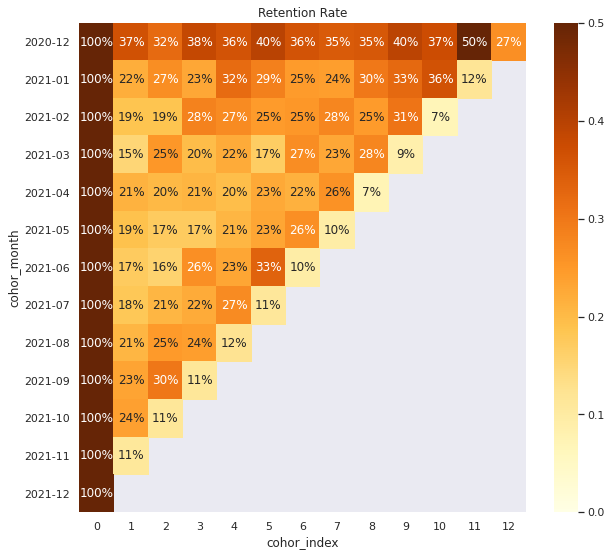

In [25]:
#Visualisasi RETENTION
plt.figure(figsize=(10,9))
plt.title("Retention Rate")
sns.heatmap(data = Retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = "YlOrBr")

plt.show()

In [26]:
#Cohor untuk kuantitas
cohor_data2 = data2.groupby(['cohor_month','cohor_index'])['Quantity'].mean().reset_index()
average_quantity  = cohor_data2.pivot_table(index = 'cohor_month',columns = 'cohor_index',values ='Quantity').round(2)
average_quantity

cohor_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohor_month,,,,,,,,,,,,,
2020-12,12.12,15.67,15.73,15.93,13.63,14.92,16.11,15.64,18.27,17.70,19.05,13.60,15.38
2021-01,17.47,13.47,12.71,15.28,12.86,15.39,14.97,14.99,11.63,10.62,9.63,10.18,NaN
2021-02,11.20,13.74,19.02,12.04,12.34,12.33,13.57,13.40,10.97,12.42,13.39,NaN,NaN
2021-03,9.96,11.74,13.31,10.12,13.76,13.01,13.46,13.85,11.32,9.70,NaN,NaN,NaN
2021-04,10.04,10.42,9.77,11.87,11.96,8.69,10.00,9.68,7.57,NaN,NaN,NaN,NaN
2021-05,11.46,9.75,14.21,12.76,11.22,8.76,10.76,113.76,NaN,NaN,NaN,NaN,NaN
2021-06,10.66,14.73,10.87,13.66,10.69,9.96,9.51,NaN,NaN,NaN,NaN,NaN,NaN
2021-07,9.92,13.75,7.40,8.18,6.21,7.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,10.08,6.20,5.44,6.15,7.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Retention.mean()*100
#data2[data2['Quantity']==80995]

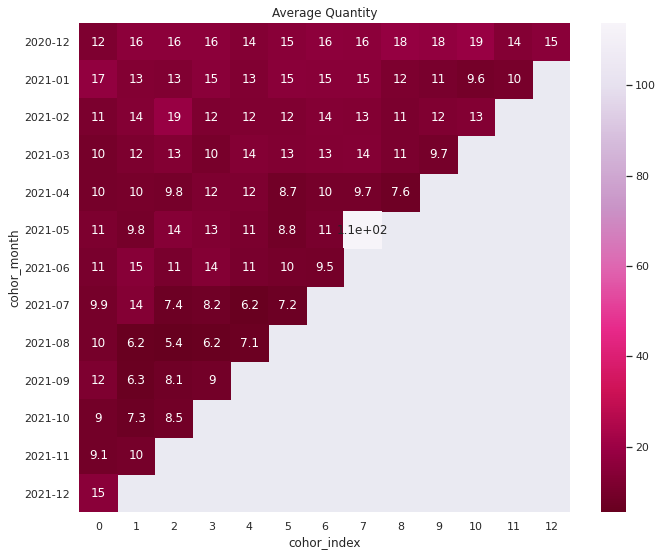

In [28]:
plt.figure(figsize = (11,9))
plt.title('Average Quantity')
sns.heatmap(data = average_quantity, annot = True, cmap = "PuRd_r")
plt.show()

In [29]:
data2['Revenue_Tot'].describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: Revenue_Tot, dtype: float64

In [30]:
#Cohor untuk avarage sale
cohort_data3 = data2.groupby(['cohor_month','cohor_index'])['Revenue_Tot'].mean().reset_index()
average_sales  = cohort_data3.pivot_table(index = 'cohor_month',
                                           columns = 'cohor_index',
                                      values = 'Revenue_Tot').round(3)
average_sales

cohor_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohor_month,,,,,,,,,,,,,
2020-12,22.219,27.263,26.860,27.186,21.192,28.136,28.338,27.431,29.235,33.463,33.993,23.631,25.841
2021-01,26.879,25.100,20.968,31.234,22.472,26.280,25.243,25.493,19.069,22.332,19.720,19.781,NaN
2021-02,17.866,20.848,21.447,19.355,17.692,16.968,22.166,22.902,18.790,22.184,23.504,NaN,NaN
2021-03,17.588,21.140,22.694,18.018,21.106,19.003,22.034,19.990,16.796,13.197,NaN,NaN,NaN
2021-04,16.951,21.029,19.493,18.737,19.548,14.999,15.252,15.967,12.343,NaN,NaN,NaN,NaN
2021-05,20.483,17.341,22.222,20.897,18.588,14.110,17.018,234.534,NaN,NaN,NaN,NaN,NaN
2021-06,23.984,16.286,19.950,20.449,15.345,16.705,13.220,NaN,NaN,NaN,NaN,NaN,NaN
2021-07,14.958,23.532,11.787,13.018,10.885,11.684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,16.522,13.158,12.525,15.883,17.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


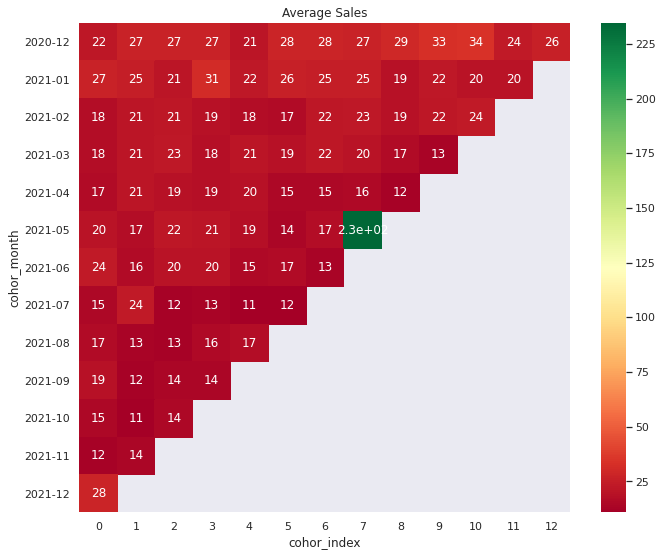

In [31]:
plt.figure(figsize = (11,9))
plt.title('Average Sales')
sns.heatmap(data = average_sales, 
            annot = True, 
            cmap = "RdYlGn")
plt.show()

**RFM (Recency (Kebaruan/waktu), Frequency(Banyak pembelian), Monetary (Jumlah pemasukan)) modelling.**

In [32]:
print(data2['InvoiceDate'].tail())

541904   2021-12-09 12:50:00
541905   2021-12-09 12:50:00
541906   2021-12-09 12:50:00
541907   2021-12-09 12:50:00
541908   2021-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]


In [33]:
#Input Tanggal pembelian terbaru
from datetime import date,datetime
import datetime as dt
date_latest = dt.date(2021,12,10)
date_new = pd.to_datetime(date_latest)
print(date_new)

2021-12-10 00:00:00


In [34]:
data2['InvoiceDate']=pd.to_datetime(data2['InvoiceDate'])
print(data2['InvoiceDate'].head())

0   2020-12-01 08:26:00
1   2020-12-01 08:26:00
2   2020-12-01 08:26:00
3   2020-12-01 08:26:00
4   2020-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [35]:
RFMScores = data2.groupby('CustomerID').agg({'InvoiceDate': lambda x: (date_new - x.max()).days,'InvoiceNo': lambda x: len(x),'Revenue_Tot': lambda x: x.sum()})
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)
RFMScores.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Revenue_Tot':'Monetary'},inplace=True)

print(RFMScores.reset_index().head(10)) #.sort_values('Recency',ascending=False).head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40
5     12352.0       36         85   2506.04
6     12353.0      204          4     89.00
7     12354.0      232         58   1079.40
8     12355.0      214         13    459.40
9     12356.0       22         59   2811.43


In [36]:
RFMScores.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.041484,90.512100,2048.215924
std,100.007757,225.515328,8984.248352
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,306.455000
50%,50.000000,41.000000,668.560000
75%,141.500000,98.000000,1660.315000
max,373.000000,7676.000000,280206.020000


In [37]:
#Membuktikan bahwa perhitungan recency sudah benar
#pilih salah satu customerID
data2[data2['CustomerID']==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue_Tot,order_month,cohor_month,cohor_index
61619,541431,23166,medium ceramic top storage jar,74215,2021-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2021-01,2021-01,0


In [38]:
#Hitung manual jumlah day sebagai penentu jumlah recency
(date_latest-dt.date(2021,1,18)).days ==326

True

In [39]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
xx=pd.DataFrame(quantiles)
xx

,Recency,Frequency,Monetary
0.25,17.0,17.0,306.455
0.50,50.0,41.0,668.560
0.75,141.5,98.0,1660.315


In [40]:
print(data2['InvoiceNo'].nunique())
data2.count()
data2.CustomerID.nunique()

18536


4339

In [41]:
#SCORING RFM
def Rscoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.50]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

#Untuk Frequency dan monetari semakin besar nilai kuartilnya maka semakin besar nilainya.
#misalkan 100*0.25 bisa menjadi 4 kali sehingga periodenya semakin banyak.
def FMscoring (x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.50]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

RFMScores['R']=RFMScores['Recency'].apply(Rscoring, args=('Recency',quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FMscoring, args=('Frequency',quantiles))
RFMScores['M']=RFMScores['Monetary'].apply(FMscoring, args=('Monetary',quantiles))

RFMScores['RFMgroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)

RFMScores['Score']=RFMScores[['R','F','M']].sum(axis=1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [63]:
#Resume kategorial level customer ideal dan jumlahnya
print('Loyal Customers        : ',len(RFMScores[RFMScores['F']==4]))
print("Big Spenders           : ",len(RFMScores[RFMScores['M']==4]))
print("Best Customers         : ",len(RFMScores[RFMScores['RFMgroup']=='444']))
print('Promising Customer     : ', len(RFMScores[RFMScores['RFMgroup']=='244']))
print('almost Lost Customers  : ',len(RFMScores[RFMScores['RFMgroup']=='144']))
print('Lost Customers         : ',len(RFMScores[RFMScores['RFMgroup']=='122']))
print('Lost Cheap Customers   : ',len(RFMScores[RFMScores['RFMgroup']=='111']))

Loyal Customers        :  1112
Big Spenders           :  1085
Best Customers         :  381
Promising Customer     :  124
almost Lost Customers  :  66
Lost Customers         :  147
Lost Cheap Customers   :  443


In [45]:
#Customer yang baru menjadi customer baru dengan visit sekali dan beli.
new_cust = RFMScores[(RFMScores['Frequency']==1) & (RFMScores['Monetary']>0)].sort_values('Monetary',ascending=False)
new_cust.Frequency.count()

71

In [46]:
#Penentuan label kelas pelanggan
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
def level_customer(x):
  if x['Score'] <=12 and x['Score'] > 9:
    return 'Platinum'
  elif x['Score'] <=9 and x['Score'] > 6:
    return 'Gold'
  elif x['Score'] <=6 and x['Score'] > 3:
    return 'Silver'
  elif x['Score'] <= 3:
    return 'Bronze'

RFMScores['Customer_Level']=RFMScores.apply(level_customer,axis=1)
print(RFMScores.head(15))
print(RFMScores.Customer_Level.value_counts())

            Recency  Frequency  Monetary  R  F  M RFMgroup  Score  \
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441      9   
12347.0           2        182   4310.00  1  1  1      111      3   
12348.0          75         31   1797.24  3  3  1      331      7   
12349.0          18         73   1757.55  2  2  1      221      5   
12350.0         310         17    334.40  4  4  3      443     11   
12352.0          36         85   2506.04  2  2  1      221      5   
12353.0         204          4     89.00  4  4  4      444     12   
12354.0         232         58   1079.40  4  2  2      422      8   
12355.0         214         13    459.40  4  4  3      443     11   
12356.0          22         59   2811.43  2  2  1      221      5   
12357.0          33        131   6207.67  2  1  1      211      4   
12358.0           1         19   1168.06  1  3  2      132      6   
12359.0          57        245   6

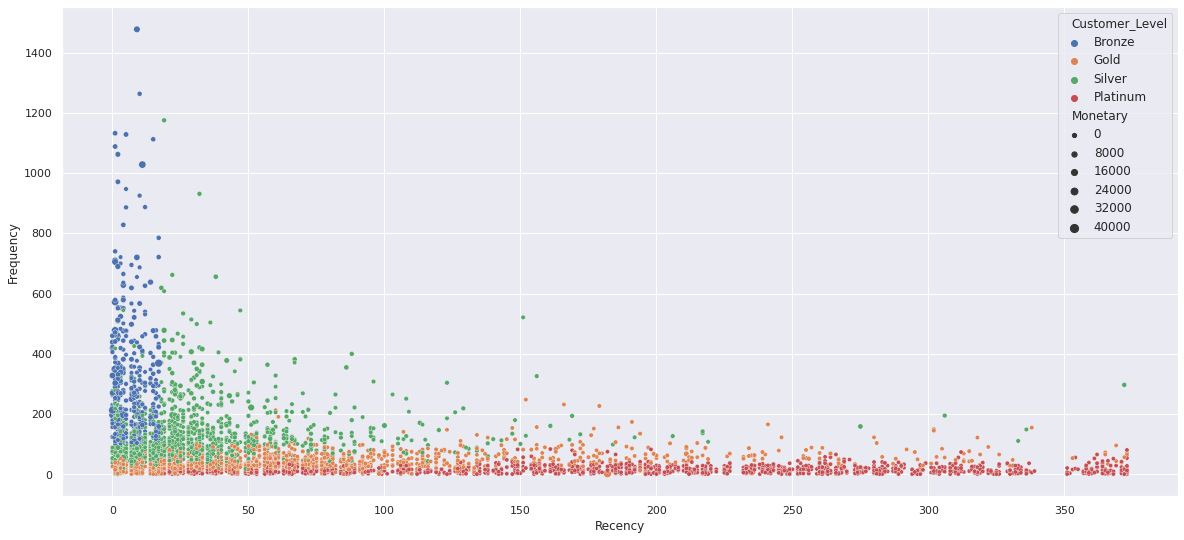

In [47]:
sct = RFMScores.query("Monetary < 50000 and Frequency < 1600")

plt.figure(figsize=(20,9))
sns.scatterplot(x='Recency',y='Frequency', size='Monetary',hue='Customer_Level',data=sct)
plt.show()

**Bentuk Perbandingan Visualisasi distribusi data Recency, Frequency dan Monetary.**

In [48]:
#import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("Customer_Level == 'Bronze'")['Recency'],
        y=graph.query("Customer_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_Level == 'Silver'")['Recency'],
        y=graph.query("Customer_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_Level == 'Gold'")['Recency'],
        y=graph.query("Customer_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("Customer_Level == 'Platinum'")['Recency'],
        y=graph.query("Customer_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Perbandingan Frequency vs Recency'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("Customer_Level == 'Bronze'")['Recency'],
        y=graph.query("Customer_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_Level == 'Silver'")['Recency'],
        y=graph.query("Customer_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_Level == 'Gold'")['Recency'],
        y=graph.query("Customer_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("Customer_Level == 'Platinum'")['Recency'],
        y=graph.query("Customer_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Perbandingan Monetary vs Recency'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("Customer_Level == 'Bronze'")['Frequency'],
        y=graph.query("Customer_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_Level == 'Silver'")['Frequency'],
        y=graph.query("Customer_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_Level == 'Gold'")['Frequency'],
        y=graph.query("Customer_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("Customer_Level == 'Platinum'")['Frequency'],
        y=graph.query("Customer_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Perbandingan Monetary vs Frequency'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



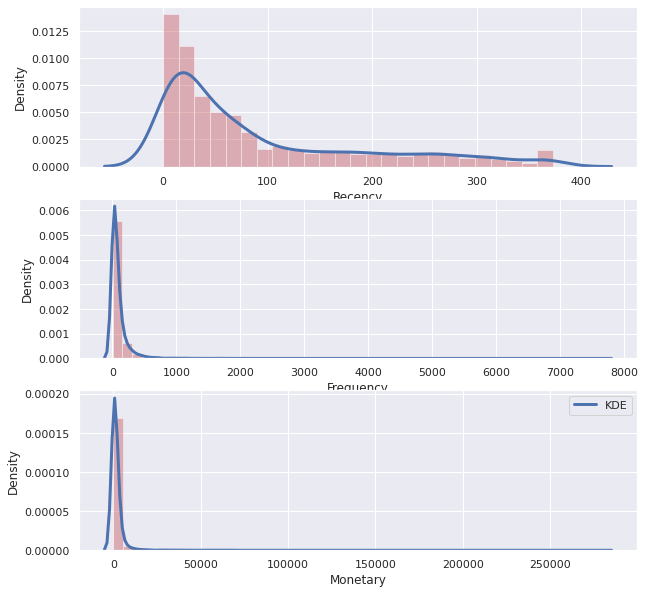

In [49]:
#Melihat distibusi data hasil RFMScore
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.distplot(RFMScores['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,2)
sns.distplot(RFMScores['Frequency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,3)
sns.distplot(RFMScores['Monetary'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})

plt.legend()
plt.show()

**K-Mean Clustering**

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [51]:
#Sebelum dilakukan clustering data harus dalam kondisi normal dan standar (satu skala)
clustering = RFMScores[['Recency',"Frequency","Monetary"]].copy()
clustering.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



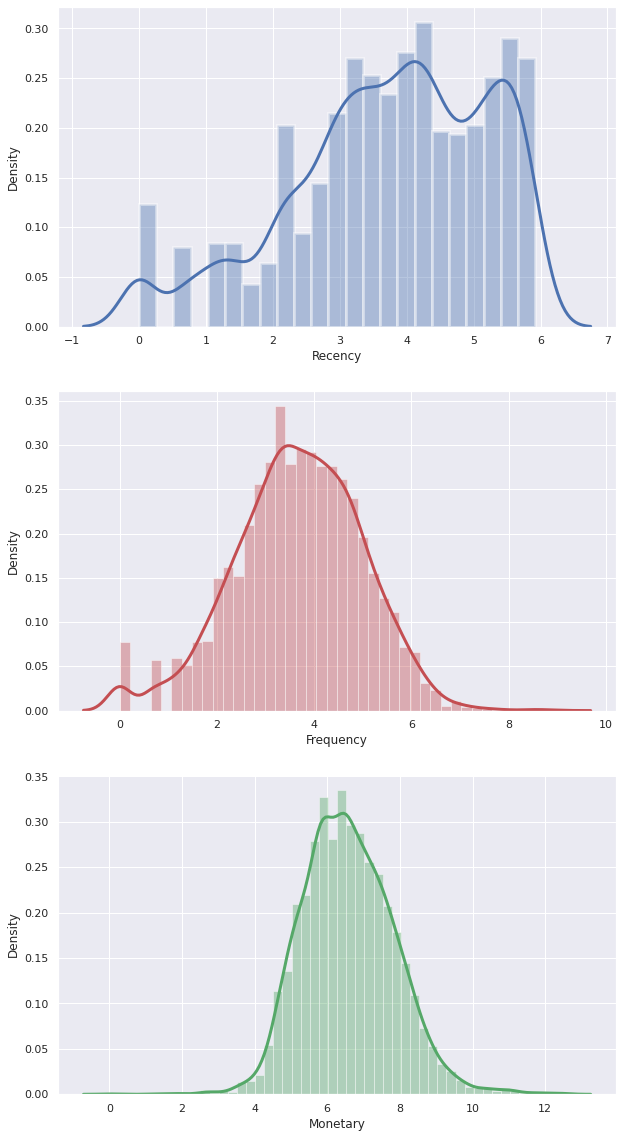

In [52]:
import numpy as np

def handle_o_n_min (num):
  if num <=1:
    return 1
  else:
    return num
  
clustering['Recency']=[handle_o_n_min(x) for x in clustering.Recency]
clustering['Monetary']=[handle_o_n_min(x) for x in clustering.Monetary]

#normalisasi dengan mengunakan log
data_norm = clustering.apply(np.log,axis=1)

#memebuktikan data sudah terdistribusi normal dengan visualisasi
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
Recency_Plot = data_norm['Recency']
sns.distplot(Recency_Plot,kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"linewidth":3,"color":"b"})

plt.subplot(3,1,2)
Frequency_Plot = data_norm.query('Frequency < 1000')['Frequency']
sns.distplot(Frequency_Plot,kde_kws={"color":"r","lw":3,"label":"KDE"},hist_kws={"color":"r"})

plt.subplot(3,1,3)
Monetary_Plot = data_norm.query('Monetary < 10000')['Monetary']
sns.distplot(Monetary_Plot,kde_kws={"color":"g","lw":3,"label":"KDE"},hist_kws={"color":"g"})


In [53]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data_norm)
data_scaled2 = pd.DataFrame(x_scaled)
data_scaled2.head()

,0,1,2
0,0.976737,0.000000,0.897209
1,0.117054,0.581723,0.667185
2,0.729111,0.383864,0.597452
3,0.488108,0.479603,0.595672
4,0.968757,0.316707,0.463383


/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning:

Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning:

Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.



Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

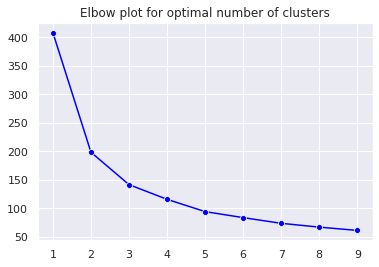

In [54]:
#Pengunaan elbow method berperan untuk menentukan jumlah cluster yang kita butuhkan
N=[]
for i in range(1,10): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data_scaled2)
    N.append(kmeans.inertia_)  

sns.lineplot(x=range(1,10),y=N,marker="o",c='blue')
plt.title("Elbow plot for optimal number of clusters")

In [55]:
kmeans = KMeans(n_clusters=4, random_state=0,init='k-means++', n_init =10,max_iter = 300).fit(data_scaled2)
pred = kmeans.predict(data_scaled2)

In [56]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

In [57]:
data_scaled2['cluster'] = kmeans.labels_
data_scaled2.head(10)

,0,1,2,cluster
0,0.976737,0.000000,0.897209,3
1,0.117054,0.581723,0.667185,2
2,0.729111,0.383864,0.597452,1
3,0.488108,0.479603,0.595672,1
4,0.968757,0.316707,0.463383,3
5,0.605163,0.496616,0.623956,1
6,0.898092,0.154965,0.357852,3
7,0.919812,0.453891,0.556805,3
8,0.906173,0.286719,0.488702,3
9,0.521996,0.455802,0.633124,1


In [58]:
RFMScores['Cluster']=kmeans.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Customer_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Gold,3
12347.0,2,182,4310.00,1,1,1,111,3,Bronze,2
12348.0,75,31,1797.24,3,3,1,331,7,Gold,1
12349.0,18,73,1757.55,2,2,1,221,5,Silver,1
12350.0,310,17,334.40,4,4,3,443,11,Platinum,3
12352.0,36,85,2506.04,2,2,1,221,5,Silver,1
12353.0,204,4,89.00,4,4,4,444,12,Platinum,3
12354.0,232,58,1079.40,4,2,2,422,8,Gold,3
12355.0,214,13,459.40,4,4,3,443,11,Platinum,3


In [59]:
##Cluster pelanggan setia.
RFMScores.groupby('Cluster').mean().sort_values('Score',ascending=False)

,Recency,Frequency,Monetary,R,F,M,Score
Cluster,,,,,,,
3,216.093458,26.007189,616.175845,3.766355,3.273185,3.208483,10.248023
0,40.471658,20.917647,436.991072,2.176471,3.388235,3.284492,8.849198
1,45.724940,128.457097,2419.763209,2.230152,1.572574,1.684844,5.487570
2,5.120104,230.825065,6010.544282,1.000000,1.591384,1.583551,4.174935


Reference for Cohorts analysis
https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea 

https://towardsdatascience.com/customer-segmentation-in-online-retail-1fc707a6f9e6

https://henryfeng.medium.com/know-users-behaviors-better-with-cohort-analysis-in-python-6c0dfc373963
